# STRUCTURE:
## - Experiment settings
#### -- Initialise the models
#### -- Fit the AR model
#### -- Fit the non-AR model
#### -- Save the models
## - Experiment results observation
#### --  Compare the models' performance
#### -- Plot the latent $\alpha$s
#### -- Plot the latent $\theta$s
#### -- Plot the latent $\phi$s
#### -- Visualise the init $\beta$s
#### -- Visualise the init $\theta$s
## - Initialisation
#### -- Define parameters
#### -- Generate or load corpus
## - Backlog
#### -- Random $\beta$s
#### -- Plotting $\alpha$s in 3-D
#### -- Load, fit, and dump
#### -- Plot the latent $\alpha$s (2plots)

# EXPERIMENT SETTINGS

### Initialise the models

In [4]:
'''
Initialising the topic model
'''
from dtm_alpha import DTM_Alpha
var_init = 1
var_basic = 0.1
var_prop = 0.3
beta = 1./V
clf_ar = DTM_Alpha(K=K, beta=beta, sigma_0_sq=var_init, sigma_sq=var_basic, 
                delta_sq=var_prop, autoreg=True)
clf_nonar = DTM_Alpha(K=K, beta=beta, sigma_0_sq=var_init, sigma_sq=var_basic, 
                delta_sq=var_prop, autoreg=False)
'''
Defining the fitting parameters
'''
n_it = 5000
n_it_add = 0
n_burn_it = 1000
PATH_OUT_PLOTS = PATH_HOME + 'data/models/{}/plots/dataset-{}/it-{}/'.format(name_corpus, no_corpus, n_it + n_it_add)
PATH_OUT_MODEL = PATH_HOME + 'data/models/{}/prefit-models/'.format(name_corpus)
PATH_OUT_PERF = PATH_HOME + 'data/models/{}/performance/'.format(name_corpus) 
'''
Initialising the visualisation factory
'''
l_row = 62
l_column = 1.25
n_rows = 8
visualiser_corpus = Visualiser_Corpus(corpus_pp, vocab, n_rows, l_row, l_column, PATH_OUT_PLOTS, no_corpus, name_corpus)
'''
Initialising the experiment helper
'''
helper_experiment = Helper_Experiment()

NameError: name 'no_corpus' is not defined

### Fit the AR model

In [32]:
name_ar = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it, str(True))
name_ar_loaded = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it + n_it_add, str(True))
''' 
Fit
'''
# clf_ar.fit(corpus=corpus_pp, n_it=n_it, n_burn_it=n_burn_it)
'''
Load and fit
'''
clf_ar.load_fit(PATH_OUT_MODEL + name_ar, n_it_add=n_it_add)

DTM_Alpha has started.
DTM_Alpha has finished.


### Fit the non-AR model

In [33]:
name_nonar = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it, str(False))
name_nonar_loaded = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it + n_it_add, str(False))
'''
Fit
'''
# clf_nonar.fit(corpus=corpus_pp, n_it=n_it, n_burn_it=n_burn_it)
'''
Load and fit
'''
clf_nonar.load_fit(PATH_OUT_MODEL + name_nonar, n_it_add=n_it_add)

DTM_Alpha has started.
DTM_Alpha has finished.


# EXPERIMENT OBSERVATION

### Compare the models' performance

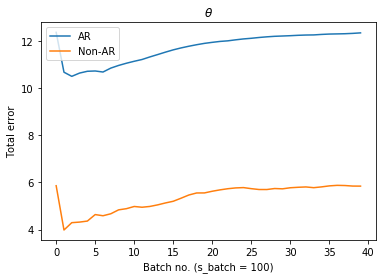

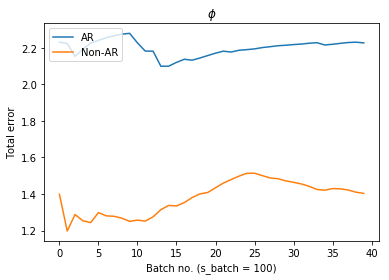

In [34]:
s_batch = 100
performance_ar = helper_experiment.calculate_performance(alpha_init=alpha_init, beta_init=beta_init,
                                                         theta_init=theta_init, clf=clf_ar, s_batch=s_batch)
performance_nonar = helper_experiment.calculate_performance(alpha_init=alpha_init, beta_init=beta_init, 
                                                            theta_init=theta_init, clf=clf_nonar, s_batch=s_batch)
import os
if not os.path.exists(PATH_OUT_PERF):
    os.makedirs(PATH_OUT_PERF)

name_ar_file = 'performance_dataset-{}_it-{}_ar-True.pkl'.format(no_corpus, n_it)
name_nonar_file = 'performance_dataset-{}_it-{}_ar-False.pkl'.format(no_corpus, n_it)

pkl.dump(performance_ar, open(PATH_OUT_PERF + name_ar_file, 'wb'))
pkl.dump(performance_nonar, open(PATH_OUT_PERF + name_nonar_file, 'wb'))

visualiser_corpus.compare_performances(performance_ar, performance_nonar, s_batch)

### Plot the latent $\theta$s

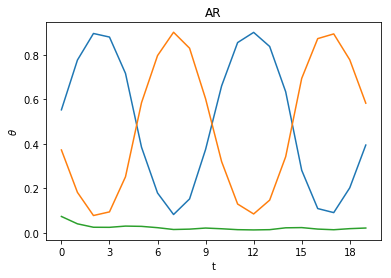

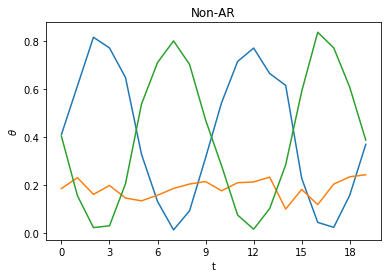

In [81]:
thetas_ar = np.array(clf_ar.hist_theta)
theta_ar_average = np.average(thetas_ar, axis=0)
visualiser_corpus.plot_latent_thetas(theta_ar_average, title='AR')

thetas_nonar = np.array(clf_nonar.hist_theta)
theta_nonar_average = np.average(thetas_nonar, axis=0)
visualiser_corpus.plot_latent_thetas(theta_nonar_average, title='Non-AR')

### Plot the latent $\phi$s

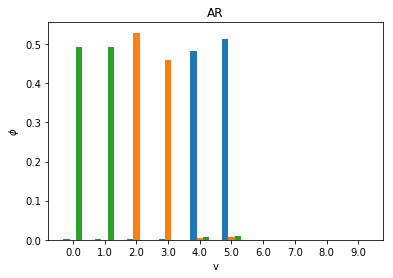

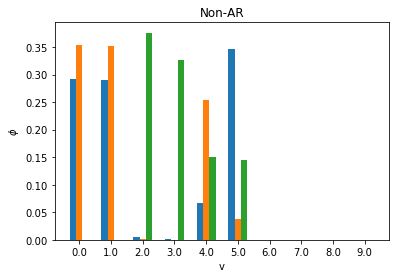

In [15]:
phis_ar = np.array(clf_ar.hist_phi)
phi_ar_average = np.average(phis_ar, axis=0)
visualiser_corpus.plot_latent_phis(phi_ar_average, title='AR')

phis_nonar = np.array(clf_nonar.hist_phi)
phi_nonar_average = np.average(phis_nonar, axis=0)
visualiser_corpus.plot_latent_phis(phi_nonar_average, title='Non-AR')

### Visualise the init $\phi$s

In [3]:
visualiser_corpus.plot_init_phi(beta_init)

NameError: name 'visualiser_corpus' is not defined

### Visualise the init $\theta$s

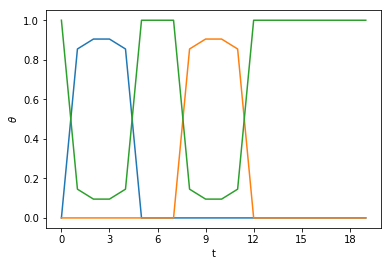

In [91]:
visualiser_corpus.plot_init_thetas(alphas=alpha_init, thetas=theta_init)
# plt.savefig('alphas-init.png')

### Visualise the init $\alpha$s

In [32]:
visualiser_corpus.plot_init_alphas(alpha_init)
# plt.savefig('alphas-init.png')

No alphas used.


### Unfinished: Extract the values for the t-test

In [11]:
no_experiment = '4'
slice_topic = "_topic-nonol"
slice_terms = "_terms-ol"
slice_error = "_error-ol"
it_experiment = '5000'

type_corpus = 'exp-{}{}{}{}'.format(no_experiment, slice_topic, slice_terms, slice_error)
type_file = '*it-{}*'.format(it_experiment)

path_experiment = PATH_HOME + 'data/models/{}/performance/'.format(type_corpus)

import glob
ar_list = glob.glob(path_experiment + type_file + 'ar-True*')
ar_list = np.array(ar_list)
nonar_list = glob.glob(path_experiment + type_file + 'ar-False*')
nonar_list = np.array(nonar_list)

'''
Read the phis
'''
thetas_ar = []
phis_ar = []
thetas_nonar = []
phis_nonar = []
for ar_model, nonar_model in zip(ar_list, nonar_list):                         
    perf_ar = pd.read_pickle(ar_model)
    theta_ar, phi_ar = perf_ar
    theta_ar = theta_ar[-1]
    phi_ar = phi_ar[-1]
    thetas_ar.append(theta_ar)
    phis_ar.append(phi_ar)
#     print('Phi AR: {}'.format(phi_ar))
    perf_nonar = pd.read_pickle(nonar_model)
    theta_nonar, phi_nonar = perf_nonar
    theta_nonar = theta_nonar[-1]
    phi_nonar = phi_nonar[-1]
    thetas_nonar.append(theta_nonar)
    phis_nonar.append(phi_nonar)
#     print('Phi Non-AR: {}'.format(phi_nonar))
    
'''
Perform the t-test
'''  
import scipy.stats as stats
t_stat_phi, p_val_phi = stats.ttest_ind(phis_ar, phis_nonar, equal_var=False)
t_stat_theta, p_val_theta = stats.ttest_ind(thetas_ar, thetas_nonar, equal_var=False)
print(t_stat_phi)
print(p_val_phi)
print(t_stat_theta)
print(p_val_theta)

print()
t_stat_rel_phi, p_val_rel_phi = stats.ttest_rel(phis_ar, phis_nonar)
print(t_stat_rel_phi)
print(p_val_rel_phi)
t_stat_rel_theta, p_val_rel_theta = stats.ttest_rel(thetas_ar, thetas_nonar)
print(t_stat_rel_theta)
print(p_val_rel_theta)


-0.880560896024
0.390856054747
-1.01166719908
0.327503987273

-0.854047318095
0.415231792967
-0.949232391277
0.367293535435


# INITIALISATION

### Set the parameters

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import pickle as pkl
np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

PATH_HOME = os.path.expanduser('~') + '/Projects/ssmsi/'
PATH_SRC_MODEL = PATH_HOME + 'code/models/'
PATH_SRC_AUXILIARY = PATH_HOME + 'code/pre-processing/'
PATH_DATA = PATH_HOME + 'data/corpora_processed/'
sys.path.append(PATH_SRC_MODEL)
sys.path.append(PATH_SRC_AUXILIARY)

V = 10
vocab = pd.read_pickle(PATH_DATA + 'vocab_synthetic.pkl')

from visualiser_corpus import Visualiser_Corpus
from processor_corpus import Processor_Corpus
from generator_corpus import Generator_Corpus
from helper_experiment import Helper_Experiment

### Choose a corpus

#### experiment-1: {sin,cos}

In [143]:
name_corpus = 'experiment-1'
K = 2
T = 20
xi = 1000

linspace_4pi = np.linspace(0, 4 * np.pi, num=T)
alpha_init = np.zeros((T, K))

alpha_init[:, 0] = np.sin(linspace_4pi)
alpha_init[:, 1] = np.cos(linspace_4pi)
theta_init = None
name_corpus += "|overlapping-yes"
beta_init = np.array([[0, 0, 0, 0.5, 0.5, 0, 0, 0, 0, 0],
                      [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0]])

#### experiment-2: = {1/2*sinx+1/2, -1/2*sinx+1/2, 1/2}

In [2]:
name_corpus = 'experiment-2'
K = 3
T = 20
xi = 100

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_4pi = np.linspace(0, 4 * np.pi, num=T)

alpha_init[:, 0] = 1./2 * np.sin(linspace_4pi) + 1/2
alpha_init[:, 1] = -1./2 * np.sin(linspace_4pi) + 1/2
alpha_init[:, 2] = np.linspace(0.5, 0.5, num=T)
theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None
'''
Non-overlapping betas
'''
name_corpus += "|overlapping-no"
beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0, 0, 0, 0, 0.5, 0.5, 0, 0, 0, 0]

#### experiment-2: = {1/2*sinx+1/2, -1/2*sinx+1/2, 1/2}
#### overlapping

In [22]:
name_corpus = 'experiment-2'
K = 3
T = 20
xi = 100

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_4pi = np.linspace(0, 4 * np.pi, num=T)

alpha_init[:, 0] = 1./2 * np.sin(linspace_4pi) + 1/2
alpha_init[:, 1] = -1./2 * np.sin(linspace_4pi) + 1/2
alpha_init[:, 2] = np.linspace(0.3, 0.3, num=T)
theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None
'''
Overlapping betas
'''
name_corpus += "|overlapping-yes"
beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0.5, 0, 0, 0.5, 0, 0, 0, 0, 0, 0]

#### experiment-3: = {1/2*sinx+1/2, -1/2*sinx+1/2, 1/2}
#### overlapping

In [83]:
name_corpus = 'experiment-3'
K = 3
T = 20
xi = 100

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_4pi = np.linspace(0, 4 * np.pi, num=T)

linspace_t = np.linspace(-T/2, T/2, num=T)
alpha_init[:, 0] = 1 / (1 + np.exp(-linspace_t))
alpha_init[:, 1] = alpha_init[:, 0][::-1]
alpha_init[:, 2] = np.linspace(0.35, 0.35, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None
'''
Overlapping betas
'''
name_corpus += "|overlapping-yes"
beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0, 0, 0, 0, 0, 0.5, 0.5, 0, 0, 0]

#### Experiment 4: Realistic MSI data settings

#### 4.1.1

In [2]:
name_corpus = 'exp-4'
name_corpus += "_topic-ol"
name_corpus += "_terms-nonol"
name_corpus += "_error-nonol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[int(0.5*size_instance):int(1.5*size_instance), 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0, 0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2]

#### 4.1.2

In [85]:
name_corpus = 'exp-4'
name_corpus += "_topic-ol"
name_corpus += "_terms-nonol"
name_corpus += "_error-ol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[int(0.5*size_instance):int(1.5*size_instance), 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

#### 4.1.3

In [85]:
name_corpus = 'exp-4'
name_corpus += "_topic-ol"
name_corpus += "_terms-ol"
name_corpus += "_error-nonol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[int(0.5*size_instance):int(1.5*size_instance), 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0, 0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2]

#### 4.1.4

In [85]:
name_corpus = 'exp-4'
name_corpus += "_topic-ol"
name_corpus += "_terms-ol"
name_corpus += "_error-ol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[int(0.5*size_instance):int(1.5*size_instance), 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

#### 4.2.1

In [85]:
name_corpus = 'exp-4'
name_corpus += "_topic-nonol"
name_corpus += "_terms-nonol"
name_corpus += "_error-nonol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[size_instance:2*size_instance, 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0, 0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2]

#### 4.2.2

In [85]:
name_corpus = 'exp-4'
name_corpus += "_topic-nonol"
name_corpus += "_terms-nonol"
name_corpus += "_error-ol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[size_instance:2*size_instance, 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

#### 4.2.3

In [85]:
name_corpus = 'exp-4'
name_corpus += "_topic-nonol"
name_corpus += "_terms-ol"
name_corpus += "_error-nonol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[size_instance:2*size_instance, 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0, 0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2]

#### 4.2.4

In [90]:
name_corpus = 'exp-4'
name_corpus += "_topic-nonol"
name_corpus += "_terms-ol"
name_corpus += "_error-ol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[size_instance:2*size_instance, 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

### Generate the corpus and initialise the helpers

In [30]:
no_corpus = 6
'''
Option 1: Load a corpus
'''
name_corpus_in = 'corpus_{}_dataset-{}_nparray.pkl'.format(name_corpus, no_corpus)
corpus_pp = pd.read_pickle(PATH_DATA + name_corpus_in)
'''
Option 2: Generate and pre-process a corpus
'''
# generator_corpus = Generator_Corpus(alpha_init=alpha_init, theta_init=theta_init, beta_init=beta_init, xi=xi, T=T)
# corpus = generator_corpus.generate_corpus()
# processor_corpus = Processor_Corpus(corpus=corpus, vocab=vocab)
# count_max = 50
# normalise = True
# corpus_pp = processor_corpus.process_corpus(threshold=count_max, normalise=normalise)

'\nOption 2: Generate and pre-process a corpus\n'

# BACKLOG

### Plotting the alphas in 3D

In [74]:
import plotly.plotly as py
from plotly.graph_objs import Surface
import plotly.graph_objs as go

history_alpha = np.array(history_alpha)

alphas_softmax_proposed = np.zeros(shape=history_alpha.shape)
for it, alpha_it in enumerate(history_alpha):
    for t, alpha_proposed_t in enumerate(alpha_it):
        alphas_softmax_proposed[it][t] = softmax(alpha_proposed_t)
    
n_alphas = alphas_softmax_proposed.shape[2]
list_alphas = []
for i in range(n_alphas):
    alpha = dict(z = alphas_softmax_proposed[:, :, i], type='surface')
    list_alphas.append(alpha)
fig = go.Figure(data=list_alphas)

py.iplot(fig)

### Load, fit, and dump

In [32]:
n_it = 1005
n_it_add = 50
var_init = 0.1
var_basic = 0.01
var_prop = 0.1
autoreg = True
name_model_in = 'init_%.0E|basic_%.0E|prop_%.0E|it_%d|autoreg_%s.pkl' \
        % (var_init, var_basic, var_prop, n_it, str(autoreg))
name_model_out = 'init_%.0E|basic_%.0E|prop_%.0E|it_%d|autoreg_%s.pkl' \
        % (var_init, var_basic, var_prop, n_it + n_it_add, str(autoreg))

dtm_alpha = DTM_Alpha()
dtm_alpha.load_fit(PATH_OUT_MODEL + name_model_in, n_it=n_it_add)

# '''
# Plot
# '''
# history_alpha = dtm_alpha.hist_alpha
# alphas_last_proposed = history_alpha[n_it-1]
# alphas_softmax_last_proposed = np.zeros(shape=alphas_last_proposed.shape)
# for t, alphas_last_proposed_t in enumerate(alphas_last_proposed):
#     alphas_softmax_last_proposed[t] = softmax(alphas_last_proposed_t)

# plt.plot(linspace_t, alphas_softmax_last_proposed, linewidth=2)

# '''
# Save the results
# '''
# plt.savefig('results/' + name_model_out + '.png')
# vars_dtm = vars(dtm_alpha)
# with open('models/' + name_model_out + '.pkl', 'wb') as f:
#         pkl.dump(vars_dtm, f)

DTM_Alpha has started.
Iteration: 1050
Alpha update rate: 0.48
DTM_Alpha has finished.


### Plot the latent $\alpha$s (2plots)

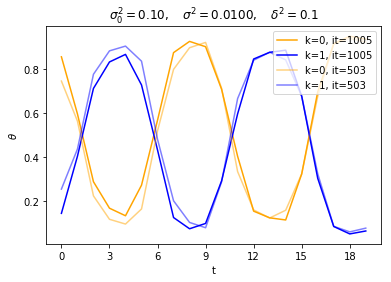

In [25]:
history_alpha = clf_ar.hist_alpha
visualiser_corpus.plot_latent_alpha2(history_alpha, n_it, var_init=var_init,
                                    var_basic=var_basic, var_prop=var_prop)
# plt.savefig(PATH_OUT_RESULTS + name_model_out + '.png', dpi=300)